In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
import xarray as xr
import rasterio
import rasterio.mask
import fiona
from skimage.io import imsave



In [2]:
# Load GeoPandas GeoSeries
# Replace 'geopandas_file.shp' with the path to your shapefile
gdf = gpd.read_file('sample_inputs/wavuwavu_river.geojson')

# Load rasterio NumPy ndarray
# Replace 'raster_file.tif' with the path to your raster file
with rasterio.open('sample_inputs/LULC_2023_wavuwavu_extent.tiff') as src:
    raster_array = src.read(1)  # Read the first band as a NumPy array
    raster_meta = src.meta


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

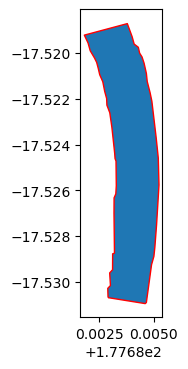

In [9]:
# Plot GeoPandas GeoSeries
ax = gdf.plot(figsize=(4, 4), edgecolor='red')

geo_crs = gdf.crs
geo_crs

In [4]:
# Convert to the new CRS
gdf_new_crs = gdf.to_crs('EPSG:3832')

# Check the new CRS
print("New CRS:", gdf_new_crs.crs)

geo_crs = gdf_new_crs.crs
geo_crs

New CRS: EPSG:3832


<Projected CRS: EPSG:3832>
Name: WGS 84 / PDC Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Pacific Ocean - American Samoa, Antarctica, Australia, Brunei Darussalam, Cambodia, Canada, Chile, China, China - Hong Kong, China - Macao, Cook Islands, Ecuador, Fiji, French Polynesia, Guam, Indonesia, Japan, Kiribati, Democratic People's Republic of Korea (North Korea), Republic of Korea (South Korea), Malaysia, Marshall Islands, Federated States of Micronesia, Nauru, New Caledonia, New Zealand, Niue, Norfolk Island, Northern Mariana Islands, Palau, Panama, Papua New Guinea (PNG), Peru, Philippines, Pitcairn, Russian Federation, Samoa, Singapore, Solomon Islands, Taiwan, Thailand, Tokelau, Tonga, Tuvalu, United States (USA), United States Minor Outlying Islands, Vanuatu, Venezuela, Vietnam, Wallis and Futuna.
- bounds: (98.69, -60.0, -68.0, 66.67)
Coordinate Operation:
- name: Pacific Disaster Center Mercator
- method: Mercator (v

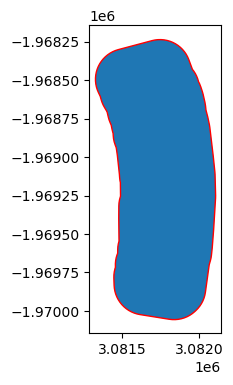

In [8]:
river_buffer = gdf_new_crs.buffer(200)
ax = river_buffer.plot(figsize=(4, 4), edgecolor='red')

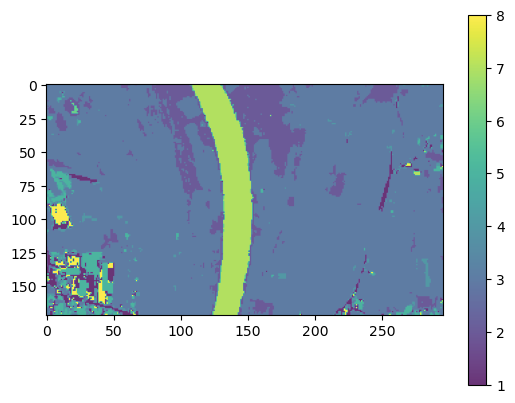

In [10]:
fig, ax = plt.subplots()

# Plot the raster array using imshow
im = ax.imshow(raster_array, cmap='viridis', alpha=0.8)

# Optionally, add a colorbar
plt.colorbar(im, ax=ax)

# Optionally, add other elements to the plot (e.g., GeoPandas geometry)
# gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()

In [11]:
raster_crs = src.crs
raster_crs

CRS.from_epsg(3832)

In [12]:
# gdf = gdf.to_crs(raster_crs)

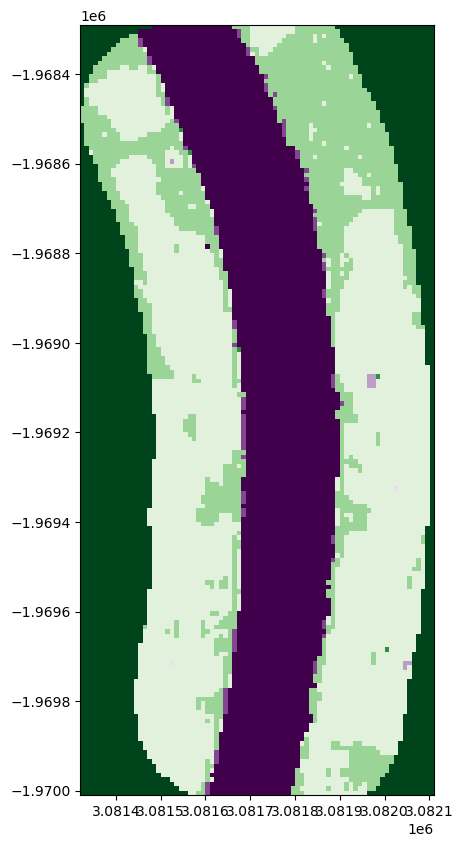

In [13]:
with rasterio.open('sample_inputs/LULC_2023_wavuwavu_extent.tiff') as src:
    out_image, out_transform = rasterio.mask.mask(src, river_buffer.geometry, crop=True)
    out_meta = src.meta

# Plot the clipped raster array
plt.figure(figsize=(10, 10))
show(out_image, transform=out_transform, cmap='PRGn_r')

# # Plot the GeoPandas GeoSeries
# gdf.plot(ax=plt.gca(), facecolor='none', edgecolor='red')

plt.show()

In [26]:
imsave('clipped.tiff', out_image.astype(np.float32))  # Ensure data type compatibility


In [8]:
# Clip the xarray DataArray by the area of the GeoPandas polygon
# Assuming your xarray DataArray is named 'data_array'
# Replace 'data_array' with your actual DataArray variable name
clipped_array, _ = rasterio.mask(src, gdf.geometry, crop=True)

TypeError: 'module' object is not callable

In [5]:

# Plot the clipped xarray DataArray
clipped_data.plot.imshow(ax=ax, cmap='terrain')

plt.show()

NameError: name 'clipped_data' is not defined

In [6]:




# Clip the raster array by the area of the GeoPandas polygon
# Replace 'gdf.geometry' with the geometry column of your GeoDataFrame
clipped_array, _ = rasterio.mask.mask(src, gdf.geometry, crop=True)

# Create a masked xarray DataArray
masked_data_array = xr.DataArray(clipped_array, dims=["y", "x"], coords={"x": raster_meta['width'], "y": raster_meta['height']})

# Plot GeoPandas GeoSeries
ax = gdf.plot(figsize=(10, 10), edgecolor='red')

# Plot the clipped xarray DataArray
masked_data_array.plot.imshow(ax=ax, cmap='terrain')

plt.show()


AttributeError: module 'rasterio' has no attribute 'mask'